In [227]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

Реализуйте алгоритм поиска ассоциативных правил на Pyhton и выполните задания. В качестве альтернативы Pyhton можно использовать платформу deductor academic. 
1. Выполните действия, описанные выше, используя различные параметры построения ассоциативных правил. Сравните полученные результаты, объясните их
2. Ответьте на вопросы:
- какой товар с наибольшей достоверностью берут с вафлями?
- человек взял мед и сыры, какой один из товаров он скорее всего не
возьмёт?
- назовите 5 самых популярных наборов товаров (в наборе может быть
один или несколько товаров).
— Опишите 4-5 ассоциативных правил, полученных в ходе выполнения
работы.
— Где еще, кроме торговли, можно использовать ассоциативные
правила? Приведите примеры.
3. Используйте 5 различных комбинаций поддержки правила и достоверности (значимости) правил и исследуйте полученные результаты.

### Поиск ассоциативных правил

In [228]:
file_path = 'Supermarket.txt'
df = pd.read_csv(file_path, sep="\t", encoding="cp1251")
df.head()

,Номер чека,Товар
0,160698,"КЕТЧУПЫ, СОУСЫ, АДЖИКА"
1,160698,МАКАРОННЫЕ ИЗДЕЛИЯ
2,160698,ЧАЙ
3,160747,МАКАРОННЫЕ ИЗДЕЛИЯ
4,160747,МЕД


Для удобства в анализе заменим 'КЕТЧУПЫ, СОУСЫ, АДЖИКА' на 'КЕТЧУПЫ-СОУСЫ-АДЖИКА' (избавимся от лишних запятых, так как в будущем можно будет запутаться)

In [229]:
df['Товар'] = df['Товар'].str.replace('КЕТЧУПЫ, СОУСЫ, АДЖИКА', 'КЕТЧУПЫ-СОУСЫ-АДЖИКА')
df.head()

,Номер чека,Товар
0,160698,КЕТЧУПЫ-СОУСЫ-АДЖИКА
1,160698,МАКАРОННЫЕ ИЗДЕЛИЯ
2,160698,ЧАЙ
3,160747,МАКАРОННЫЕ ИЗДЕЛИЯ
4,160747,МЕД


Прежде чем получить наиболее часто встречающиеся наборы элементов, необходимо преобразовать набор данных в матрицу «Истина – Ложь», где строки представляют собой транзакции, а столбцы – продукты

In [230]:
basket = df.pivot_table(index="Номер чека", columns="Товар", aggfunc=lambda x: 1, fill_value=0)
basket.head()

Товар,ВАФЛИ,КЕТЧУПЫ-СОУСЫ-АДЖИКА,МАКАРОННЫЕ ИЗДЕЛИЯ,МЕД,СУХАРИ,СЫРЫ,ЧАЙ
Номер чека,,,,,,,
160227,0,1,1,1,0,0,1
160487,0,1,1,1,0,0,1
160698,0,1,1,0,0,0,1
160747,0,0,1,1,0,0,1
161217,0,1,1,0,0,1,0


Для реализации алгоритма поиска ассоциативных правил в Python можно использовать библиотеку mlxtend, которая предоставляет удобные функции для выполнения анализа правил. С помощью алгоритма Apriori найдем частые наборы товаров

In [231]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets_sorted

,support,itemsets,length
6,0.750000,(ЧАЙ),1
2,0.545455,(МАКАРОННЫЕ ИЗДЕЛИЯ),1
1,0.522727,(КЕТЧУПЫ-СОУСЫ-АДЖИКА),1
3,0.500000,(МЕД),1
13,0.454545,"(КЕТЧУПЫ-СОУСЫ-АДЖИКА, МАКАРОННЫЕ ИЗДЕЛИЯ)",2
...,...,...,...
8,0.022727,"(ВАФЛИ, МАКАРОННЫЕ ИЗДЕЛИЯ)",2
27,0.022727,"(ЧАЙ, ВАФЛИ, КЕТЧУПЫ-СОУСЫ-АДЖИКА)",3
44,0.022727,"(ЧАЙ, СУХАРИ, МАКАРОННЫЕ ИЗДЕЛИЯ)",3
43,0.022727,"(СУХАРИ, МАКАРОННЫЕ ИЗДЕЛИЯ, СЫРЫ)",3


Вывод показывает, что чай является наиболее встречающимся элементом набора данных, значит его покупают чаще всего. Поробуем рассмотреть пары товаров

In [232]:
frequent_itemsets_sorted[(frequent_itemsets_sorted['length'] == 2)].head()

,support,itemsets,length
13,0.454545,"(КЕТЧУПЫ-СОУСЫ-АДЖИКА, МАКАРОННЫЕ ИЗДЕЛИЯ)",2
23,0.409091,"(ЧАЙ, МЕД)",2
16,0.295455,"(ЧАЙ, КЕТЧУПЫ-СОУСЫ-АДЖИКА)",2
12,0.295455,"(ЧАЙ, ВАФЛИ)",2
20,0.295455,"(ЧАЙ, МАКАРОННЫЕ ИЗДЕЛИЯ)",2


Видим, что в парах чаще всего покупают макароны с соусами, либо чай с медом. Всё вроде бы логично. Посмотрим так же тройки

In [233]:
frequent_itemsets_sorted[(frequent_itemsets_sorted['length'] == 3)].head()

,support,itemsets,length
37,0.227273,"(ЧАЙ, КЕТЧУПЫ-СОУСЫ-АДЖИКА, МАКАРОННЫЕ ИЗДЕЛИЯ)",3
33,0.204545,"(ЧАЙ, ВАФЛИ, СУХАРИ)",3
36,0.204545,"(КЕТЧУПЫ-СОУСЫ-АДЖИКА, МАКАРОННЫЕ ИЗДЕЛИЯ, СЫРЫ)",3
35,0.181818,"(КЕТЧУПЫ-СОУСЫ-АДЖИКА, МЕД, МАКАРОННЫЕ ИЗДЕЛИЯ)",3
48,0.181818,"(ЧАЙ, МЕД, СЫРЫ)",3


Самым популярным набором является чай, макароны и соусы. В целом это является совмещением друх сделанных ранее выводов, так как одним самым популярным товаром является чай, а двумя - макароны с соусами

На основе частых наборов сгенерируем ассоциативные правила

In [234]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2, num_itemsets=2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
0,(ВАФЛИ),(СУХАРИ),0.318182,0.318182,0.227273,0.714286,2.244898,1.0,0.126033,2.386364,0.813333,0.555556,0.580952,0.714286,1,1
1,(СУХАРИ),(ВАФЛИ),0.318182,0.318182,0.227273,0.714286,2.244898,1.0,0.126033,2.386364,0.813333,0.555556,0.580952,0.714286,1,1
2,(ЧАЙ),(ВАФЛИ),0.750000,0.318182,0.295455,0.393939,1.238095,1.0,0.056818,1.125000,0.769231,0.382353,0.111111,0.661255,1,1
3,(ВАФЛИ),(ЧАЙ),0.318182,0.750000,0.295455,0.928571,1.238095,1.0,0.056818,3.500000,0.282051,0.382353,0.714286,0.661255,1,1
4,(КЕТЧУПЫ-СОУСЫ-АДЖИКА),(МАКАРОННЫЕ ИЗДЕЛИЯ),0.522727,0.545455,0.454545,0.869565,1.594203,1.0,0.169421,3.484848,0.780952,0.740741,0.713043,0.851449,1,1


В этой таблице показана взаимосвязь между различными товарами и вероятностью того, что клиент купит эти товары вместе. Например, согласно таблице выше, ожидается, что клиенты, купившие вафли, купят сухари с вероятностью 71 процент (уверенность). То-есть, правило звучит так: ЕСЛИ купит вафли, ТО купит сухари с вероятность 71 процент

Опишем подробно первое ассоциативное правило:
1) antecedent support — Поддержка (или частота) предшествующего набора товаров. В данном случае 0.318182. Это означает, что около 31.8% всех транзакций содержат товар "ВАФЛИ"
2) consequent support — Поддержка (или частота) последующего набора товаров. В данном случае 0.318182. Это означает, что около 31.8% всех транзакций содержат товар "СУХАРИ"
3) support — Общая поддержка для правила (сочетание предшественника и последующего набора товаров). В данном случае 0.227273. Это означает, что 22.7% всех транзакций содержат как "ВАФЛИ", так и "СУХАРИ". Это количество транзакций, где оба товара появляются вместе
4) confidence — Уверенность (confidence) в правиле. В данном случае 0.714286. Это означает, что среди всех транзакций, где встречаются "ВАФЛИ", в 71.4% случаев также покупаются "СУХАРИ". Это мера того, насколько часто покупатели, покупая предшествующий товар, покупают и последующий товар
5) lift — Подъем (lift) для данного правила. В данном случае 2.244898. Это означает, что вероятность покупки "СУХАРИ" при наличии "ВАФЛИ" в 2.24 раза выше, чем если бы покупки были независимыми. Если lift > 1, это указывает на положительную зависимость между товарами
6) representativity — Репрезентативность правила. Это метрика, которая оценивает, насколько хорошо правило представлено в наборе данных. В данном случае равна 1.0, что может означать, что правило полностью соответствует данным.
7) leverage — Левередж (leverage) для данного правила. В данном случае 0.126033. Левередж измеряет отклонение от случайного распределения. Чем выше значение, тем сильнее зависимость между товарами. Положительное значение говорит о том, что товары появляются чаще вместе, чем случайным образом.
8) conviction — Убеждение (conviction). В данном случае 2.386364. Это мера, которая показывает, насколько правило сильно по сравнению с тем, что было бы, если бы товары были независимы. Чем выше значение, тем сильнее правило
9) zhangs_metric — Метрика Жанга. Это другая метрика для оценки ассоциации. В данном случае 0.813333. Высокое значение указывает на сильную ассоциацию между товарами
10) jaccard — Индекс Жаккара для данного правила. В данном случае 0.555556. Это мера схожести между двумя наборами. Чем выше значение, тем больше товаров пересекаются между предшествующим и последующим набором
11) certainty — Уверенность в правиле. Это аналогично метрике confidence, но с добавлением дополнительных расчетов. В данном случае 0.580952
12)  kulczynski — Мера Кульчинского для ассоциации. В данном случае 0.714286. Это еще одна метрика, используемая для оценки силы ассоциации, где значение больше 0.5 указывает на значимую зависимость
13) antecedents_length — Длина предшествующего набора товаров. В данном случае равна 1, что означает, что предшествующий набор состоит из одного товара (в данном случае "ВАФЛИ")
14) consequents_length — Длина последующего набора товаров. В данном случае равна 1, что означает, что последующий набор состоит из одного товара (в данном случае "СУХАРИ")

Попробуем отсортировать, чтобы увидеть самые частые комбинации

In [235]:
rules_sorted = rules.sort_values("confidence", ascending=False)
rules_sorted.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
10,"(ВАФЛИ, МАКАРОННЫЕ ИЗДЕЛИЯ)",(СУХАРИ),0.022727,0.318182,0.022727,1.0,3.142857,1.0,0.015496,inf,0.697674,0.071429,1.0,0.535714,2,1
20,"(ВАФЛИ, МЕД)",(ЧАЙ),0.136364,0.750000,0.136364,1.0,1.333333,1.0,0.034091,inf,0.289474,0.181818,1.0,0.590909,2,1
8,"(ВАФЛИ, КЕТЧУПЫ-СОУСЫ-АДЖИКА)",(ЧАЙ),0.022727,0.750000,0.022727,1.0,1.333333,1.0,0.005682,inf,0.255814,0.030303,1.0,0.515152,2,1


Те правила, которые имеют confidence=1 (100 процентов), при этом имеют очень маленькую поддержку. Это говорит о том, что такие комбинации встречаются очень редко. Поэтому такую маленькую поддержку лучше не использовать 

Теперь нужно использовать различные параметры ассоциативных правил:
1) metric: Метрика оценки качества правил. Например, "confidence", "lift", "leverage"
    1) Confidence (Достоверность) показывает вероятность того, что товары из consequents будут куплены, если товары из antecedents уже куплены. Пример: Если 80% покупателей, купивших вафли, также покупают чай, то достоверность = 0.8. Формула: 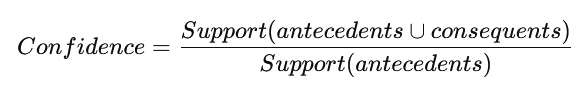
    2) Lift (Подъем) отражает, насколько сильнее связаны товары antecedents и consequents по сравнению со случаем, если бы они покупались независимо. Lift > 1: Товары связаны положительно (одновременная покупка вероятнее случайной). Формула: 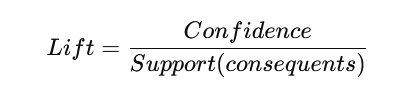
    3) Leverage (Леверидж) показывает разницу между фактической вероятностью совместной покупки и ожидаемой вероятностью (при независимости). Пример: Леверидж близок к нулю, если товары покупаются независимо. Формула: 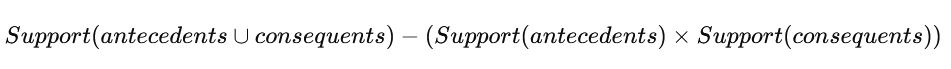
2) min_threshold: Минимальное значение метрики. Этот параметр задает минимальный порог для выбранной метрики. Все правила, значения метрики которых ниже этого порога, отбрасываются. Пример с confidence: Если min_threshold=0.8, алгоритм оставит только правила с достоверностью 80% или выше. Пример с lift: Если вы установили min_threshold=1.5, алгоритм отфильтрует только те правила, где связь между товарами сильнее случайной на 50% или больше
3) min_support: Минимальная поддержка, задаваемая при генерации frequent_itemsets. min_support определяет минимальную долю транзакций, в которых встречается данный набор товаров, чтобы он считался "частым" (frequent itemset). Этот параметр задается на этапе генерации частых наборов (frequent_itemsets). Пример: Если есть 1000 покупок и комбинация товаров (ЧАЙ, ВАФЛИ) встречается в 200 из них, то поддержка этой комбинации равна: 200/1000=0.2 Формула: 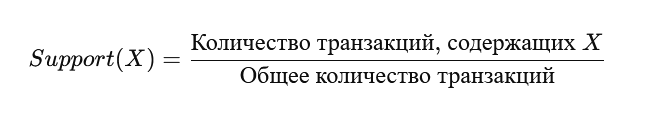

In [236]:
from IPython.display import display
experiments = [
    {"metric": "confidence", "min_threshold": 0.6},
    {"metric": "lift", "min_threshold": 1.5},
    {"metric": "confidence", "min_threshold": 0.8},
    {"metric": "leverage", "min_threshold": 0.05},
    {"metric": "lift", "min_threshold": 1.2},
]

results = []

for exp in experiments:
    rules_exp = association_rules(frequent_itemsets, 
                              metric=exp["metric"], 
                              min_threshold=exp["min_threshold"],
                              num_itemsets=2)
    rules_exp["antecedents_length"] = rules_exp["antecedents"].apply(lambda x: len(x))
    rules_exp["consequents_length"] = rules_exp["consequents"].apply(lambda x: len(x))    
    results.append({"params": exp, "rules_exp": rules_exp})

for i, res in enumerate(results):
    print(f"Номер {i+1}: Параметры: {res['params']}")
    display(res["rules_exp"].head(1))
    print()


Номер 1: Параметры: {'metric': 'confidence', 'min_threshold': 0.6}


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
0,(ВАФЛИ),(СУХАРИ),0.318182,0.318182,0.227273,0.714286,2.244898,1.0,0.126033,2.386364,0.813333,0.555556,0.580952,0.714286,1,1



Номер 2: Параметры: {'metric': 'lift', 'min_threshold': 1.5}


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
0,(ВАФЛИ),(СУХАРИ),0.318182,0.318182,0.227273,0.714286,2.244898,1.0,0.126033,2.386364,0.813333,0.555556,0.580952,0.714286,1,1



Номер 3: Параметры: {'metric': 'confidence', 'min_threshold': 0.8}


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
0,(ВАФЛИ),(ЧАЙ),0.318182,0.75,0.295455,0.928571,1.238095,1.0,0.056818,3.5,0.282051,0.382353,0.714286,0.661255,1,1



Номер 4: Параметры: {'metric': 'leverage', 'min_threshold': 0.05}


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
0,(ВАФЛИ),(СУХАРИ),0.318182,0.318182,0.227273,0.714286,2.244898,1.0,0.126033,2.386364,0.813333,0.555556,0.580952,0.714286,1,1



Номер 5: Параметры: {'metric': 'lift', 'min_threshold': 1.2}


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
0,(ВАФЛИ),(СУХАРИ),0.318182,0.318182,0.227273,0.714286,2.244898,1.0,0.126033,2.386364,0.813333,0.555556,0.580952,0.714286,1,1


Выводы: Confidence (с порогами 0.6 и 0.8) выявляет уверенные ассоциации, где вероятность покупки одного товара при наличии другого очень высока. Lift (с порогом 1.5) акцентирует внимание на более сильных ассоциациях, где товары связаны значительно чаще, чем ожидалось бы случайно. Leverage (с порогом 0.05) ищет более слабые ассоциации, основанные на отклонениях от независимости, что позволяет выявлять даже неочевидные зависимости

### Ответы на вопросы

Какой товар с наибольшей достоверностью берут с вафлями? Для ответа на этот вопрос надо найти товар, который с наибольшей уверенностью (confidence) ассоциируется с вафлями в качестве предшествующего товара

In [237]:
rules_with_waffles = rules[(rules['antecedents'].apply(lambda x: 'ВАФЛИ' in x)) & (rules['antecedents_length'] == 1)]
rules_with_waffles.sort_values(by='confidence', ascending=False).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
3,(ВАФЛИ),(ЧАЙ),0.318182,0.75,0.295455,0.928571,1.238095,1.0,0.056818,3.5,0.282051,0.382353,0.714286,0.661255,1,1


Таким образом, с вафлями чаще всего берут чай!

Если человек взял мёд и сыры, что он скорее всего не возьмёт?

In [238]:
rules_with_honey_cheese = rules[rules['antecedents'].apply(lambda x: {'МЕД', 'СЫРЫ'}.issubset(x))]
consequents_frequency = rules_with_honey_cheese['consequents'].explode().value_counts()

print("Рассмотрим количество каждого товара, покупаемого с медом и сыром")
for item, count in consequents_frequency.items():
    print(f"Товар: {item}, Количество: {count}")


Рассмотрим количество каждого товара, покупаемого с медом и сыром
Товар: ЧАЙ, Количество: 14
Товар: СУХАРИ, Количество: 5
Товар: ВАФЛИ, Количество: 5
Товар: МАКАРОННЫЕ ИЗДЕЛИЯ, Количество: 3
Товар: КЕТЧУПЫ-СОУСЫ-АДЖИКА, Количество: 3


Таким образом, вместе с медом и сыром вряд ли купят макаронные изделия и кетчупы-соусы-аджику

Пять самых популярных наборов товаров

In [239]:
frequent_itemsets_sorted.head()

,support,itemsets,length
6,0.750000,(ЧАЙ),1
2,0.545455,(МАКАРОННЫЕ ИЗДЕЛИЯ),1
1,0.522727,(КЕТЧУПЫ-СОУСЫ-АДЖИКА),1
3,0.500000,(МЕД),1
13,0.454545,"(КЕТЧУПЫ-СОУСЫ-АДЖИКА, МАКАРОННЫЕ ИЗДЕЛИЯ)",2


Ассоциативные правила также применимы в:
1) Медицине: анализ совместной встречаемости симптомов и заболеваний
2) Банковской сфере: выявление комбинаций продуктов, которые чаще всего используют клиенты (например, кредитная карта и депозит)
3) Маркетинг: анализ поведения пользователей на сайте для персонализации рекламы
4) Социальные сети: рекомендации друзей или контента

### Разные комбинации параметров. Исследуем 5 различных комбинаций параметров для support и confidence:

In [240]:
for support, confidence in [(0.3, 0.5), (0.2, 0.6), (0.1, 0.7), (0.05, 0.8), (0.01, 0.9)]:
    frequent_itemsets = apriori(basket, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence, num_itemsets=3)
    rules_sorted = rules.sort_values("confidence", ascending=False)
    print(f"\nSupport={support}, Confidence={confidence}")
    display(rules_sorted.head(1))
    print(rules.shape)


Support=0.3, Confidence=0.5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(КЕТЧУПЫ-СОУСЫ-АДЖИКА),(МАКАРОННЫЕ ИЗДЕЛИЯ),0.522727,0.545455,0.454545,0.869565,1.594203,1.0,0.169421,3.484848,0.780952,0.740741,0.713043,0.851449


(4, 14)

Support=0.2, Confidence=0.6


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(ВАФЛИ),(ЧАЙ),0.318182,0.75,0.295455,0.928571,1.238095,1.0,0.056818,3.5,0.282051,0.382353,0.714286,0.661255


(17, 14)

Support=0.1, Confidence=0.7


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18,"(СУХАРИ, СЫРЫ)",(ЧАЙ),0.113636,0.75,0.113636,1.0,1.333333,1.0,0.028409,inf,0.282051,0.151515,1.0,0.575758


(19, 14)

Support=0.05, Confidence=0.8


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
16,"(ВАФЛИ, МЕД, СЫРЫ)",(ЧАЙ),0.068182,0.75,0.068182,1.0,1.333333,1.0,0.017045,inf,0.268293,0.090909,1.0,0.545455


(20, 14)

Support=0.01, Confidence=0.9


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,"(ВАФЛИ, МАКАРОННЫЕ ИЗДЕЛИЯ)",(СУХАРИ),0.022727,0.318182,0.022727,1.0,3.142857,1.0,0.015496,inf,0.697674,0.071429,1.0,0.535714


(28, 14)


По мере снижения параметра support (порог минимальной поддержки), увеличивается количество правил. Это логично, так как снижение минимальной поддержки допускает правила с меньшей частотой появления в транзакциях, что добавляет больше редких комбинаций. При этом с увеличением минимальной уверенности (confidence) остаются только правила с высокой достоверностью. Выводы по параметрам: 
1) Порог поддержки (support): чем ниже поддержка, тем больше редких правил включается в выборку. Однако низкая поддержка может привести к включению нерелевантных комбинаций, которые встречаются только в единичных случаях, например, (ВАФЛИ, МЕД, СЫРЫ → ЧАЙ)
2) Порог уверенности (confidence): чем выше порог уверенности, тем меньше правил, так как остаются только те, где высокая вероятность связи между товарами. Высокая уверенность означает, что правило более достоверно, но можно пропустить правила с важными, но менее очевидными зависимостями
